<a href="https://colab.research.google.com/github/nathanzilgo/Data-Science-Notebooks/blob/master/Regress%C3%A3o_M%C3%BAltipla_para_previs%C3%A3o_de_Desempenho_Acad%C3%AAmico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Múltipla para previsão de Desempenho Acadêmico

Nessa tarefa você vai construir modelos de regressão para a previsão do desempenho acadêmico de estudantes de escola utilizando alguns valores sobre a rotina do estudante. O dataset está disponível neste linkLinks to an external site., você deve fazer o upload dele no seu Colab Notebook.

O dataset tem 10 colunas: study_hours_per_week, books_read_year, extracurricular_participation, sleep_hours_per_night,  junk_food_consumption_per_week, commute_time_to_school_min, study_hours_with_assistance,study_hours_with_assistance, sport, anxiety_level_test, final_grade.

* **study_hours_per_week**: Horas estudadas por semana;
* **books_read_year**: Lidos livros por ano;
* **extracurricular_participation**: Participação em atividades extracurriculares;
* **sleep_hours_per_night**: Horas dormidas por noite;
* **junk_food_consumption_per_week**: Consumo de alimentos não saudáveis;
* **commute_time_to_school_min**: Tempo do trajeto para a escola em minutos;
* **study_hours_with_assistance**: Horas de estudo com auxílio;
* **sport**: Esporte praticado;
* **anxiety_level_test**: Nível de ansiedade durante os testes;
* **final_grade**: Nota final, essa é nossa variável alvo.


Importando Dataset e lendo csv com Pandas

In [ ]:
import pandas as pd

In [ ]:
!gdown --id 14vm9IOF-T5Y5DcmrH2VclX_fb2-abfyi


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=14vm9IOF-T5Y5DcmrH2VclX_fb2-abfyi
To: /content/final_grades.csv
100% 343k/343k [00:00<00:00, 73.7MB/s]


In [ ]:
df = pd.read_csv('final_grades.csv')

In [ ]:
df

,study_hours_per_week,books_read_year,extracurricular_participation,sleep_hours_per_night,junk_food_consumption_per_week,commute_time_to_school_min,study_hours_with_assistance,sport,anxiety_level_test,final_grade
0,18.065560,93,No,8.523188,0,1,7,Basketball,2,52.62
1,34.269198,19,No,9.644920,7,5,29,Swimming,1,59.90
2,37.763791,76,No,4.377829,11,13,13,Basketball,3,81.21
3,13.437846,2,No,4.644968,10,2,47,Baseball,2,30.57
4,22.427779,37,No,4.486873,1,10,45,Basketball,1,68.09
...,...,...,...,...,...,...,...,...,...,...
4995,20.507358,22,No,11.416860,12,8,43,Volleyball,3,48.68
4996,5.873927,81,No,9.685338,18,6,54,Basketball,2,50.36
4997,22.041254,23,Yes,11.494765,4,0,56,Soccer,1,64.67
4998,5.786196,67,Yes,9.279768,1,0,43,Soccer,0,69.71


In [ ]:
df.shape

(5000, 10)

# 1. Análise exploratória dos dados

In [ ]:
atributes = [col for col in df.columns if col != 'final_grade']
y_column = 'final_grade'
atributes

['study_hours_per_week',
 'books_read_year',
 'extracurricular_participation',
 'sleep_hours_per_night',
 'junk_food_consumption_per_week',
 'commute_time_to_school_min',
 'study_hours_with_assistance',
 'sport',
 'anxiety_level_test']

In [ ]:
X, y = df[atributes], df['final_grade']

In [ ]:
X

,study_hours_per_week,books_read_year,extracurricular_participation,sleep_hours_per_night,junk_food_consumption_per_week,commute_time_to_school_min,study_hours_with_assistance,sport,anxiety_level_test
0,18.065560,93,No,8.523188,0,1,7,Basketball,2
1,34.269198,19,No,9.644920,7,5,29,Swimming,1
2,37.763791,76,No,4.377829,11,13,13,Basketball,3
3,13.437846,2,No,4.644968,10,2,47,Baseball,2
4,22.427779,37,No,4.486873,1,10,45,Basketball,1
...,...,...,...,...,...,...,...,...,...
4995,20.507358,22,No,11.416860,12,8,43,Volleyball,3
4996,5.873927,81,No,9.685338,18,6,54,Basketball,2
4997,22.041254,23,Yes,11.494765,4,0,56,Soccer,1
4998,5.786196,67,Yes,9.279768,1,0,43,Soccer,0


In [ ]:
y.mean()

61.646234

In [ ]:
y

0       52.62
1       59.90
2       81.21
3       30.57
4       68.09
        ...  
4995    48.68
4996    50.36
4997    64.67
4998    69.71
4999    67.62
Name: final_grade, Length: 5000, dtype: float64

In [ ]:
X['sport'].unique()

array(['Basketball', 'Swimming', 'Baseball', 'Lacrosse', 'Soccer',
       'Volleyball', 'Football', 'Athletics', 'Wrestling', 'Cheerleading'],
      dtype=object)

In [ ]:
sports = {'Basketball': 1, 'Swimming': 2, 'Baseball': 3, 'Lacrosse': 4, 'Soccer': 5,
       'Volleyball': 6, 'Football': 7, 'Athletics': 8, 'Wrestling': 9, 'Cheerleading': 10}
participation = {'Yes': 1, 'No': 0}

X['extracurricular_participation'] = X['extracurricular_participation'].map(participation)
X['sport'] = X['sport'].map(sports)


<ipython-input-12-f36a9fc6757b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['extracurricular_participation'] = X['extracurricular_participation'].map(participation)
<ipython-input-12-f36a9fc6757b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sport'] = X['sport'].map(sports)


## Correlações entre as variáveis preditoras

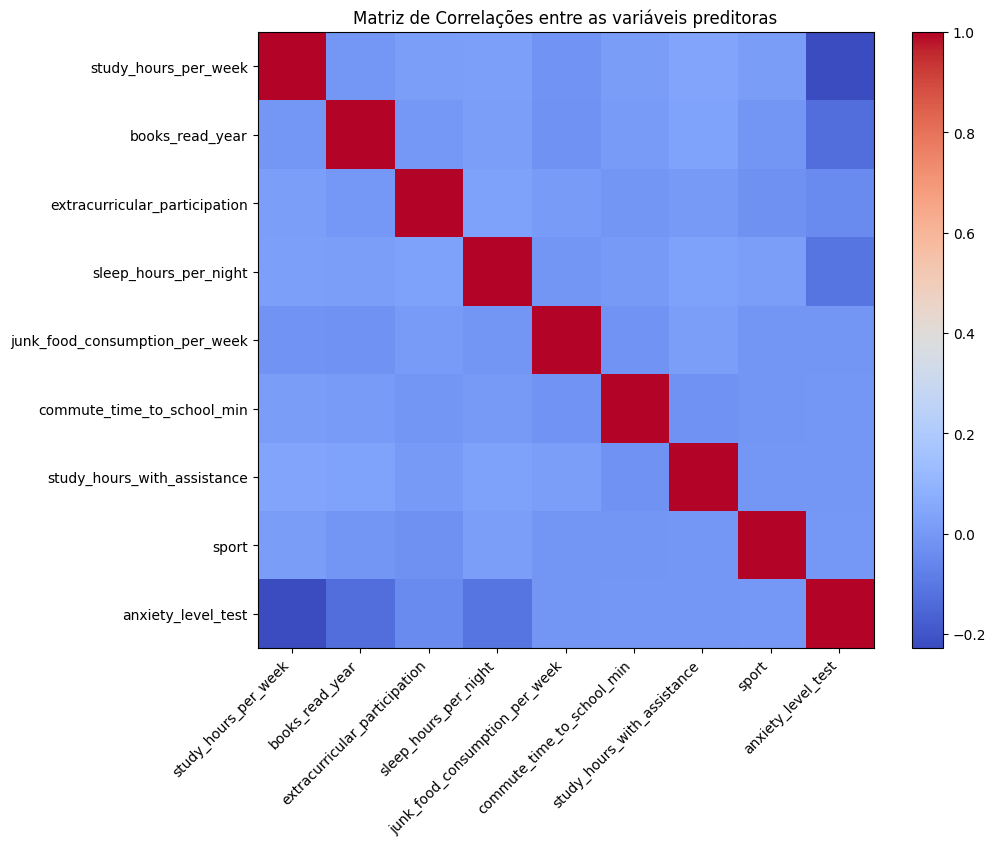

In [ ]:
import matplotlib.pyplot as plt

corr = X.corr()
plt.figure(figsize=(10, 8))

# Create a colormap for the correlation matrix
cmap = 'coolwarm'

# Create the heatmap
plt.imshow(corr, cmap=cmap)

# Add colorbar
plt.colorbar()

# Add labels for each cell (optional)
# You can uncomment this block to add labels if you want
# for i in range(len(corr.columns)):
#     for j in range(len(corr.columns)):
#         plt.text(i, j, corr.iloc[i, j], ha='center', va='center', fontsize=8)

# Add labels for axes
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr.columns)), corr.columns)

# Add title
plt.title('Matriz de Correlações entre as variáveis preditoras')

# Show the plot
plt.show()

As correlações mais fortes foram entre study_hours_per_week com anxiety_level_test, books_read_year com anxiety_level_test e sleep_hours_per_night com anxiety_level_test.

## Correlação entre cada variável preditora e a variável-alvo.

In [ ]:
df = pd.get_dummies(df, columns=['sport', 'extracurricular_participation'])

df.head()

,study_hours_per_week,books_read_year,sleep_hours_per_night,junk_food_consumption_per_week,commute_time_to_school_min,study_hours_with_assistance,anxiety_level_test,final_grade,sport_Athletics,sport_Baseball,sport_Basketball,sport_Cheerleading,sport_Football,sport_Lacrosse,sport_Soccer,sport_Swimming,sport_Volleyball,sport_Wrestling,extracurricular_participation_No,extracurricular_participation_Yes
0,18.065560,93,8.523188,0,1,7,2,52.62,False,False,True,False,False,False,False,False,False,False,True,False
1,34.269198,19,9.644920,7,5,29,1,59.90,False,False,False,False,False,False,False,True,False,False,True,False
2,37.763791,76,4.377829,11,13,13,3,81.21,False,False,True,False,False,False,False,False,False,False,True,False
3,13.437846,2,4.644968,10,2,47,2,30.57,False,True,False,False,False,False,False,False,False,False,True,False
4,22.427779,37,4.486873,1,10,45,1,68.09,False,False,True,False,False,False,False,False,False,False,True,False


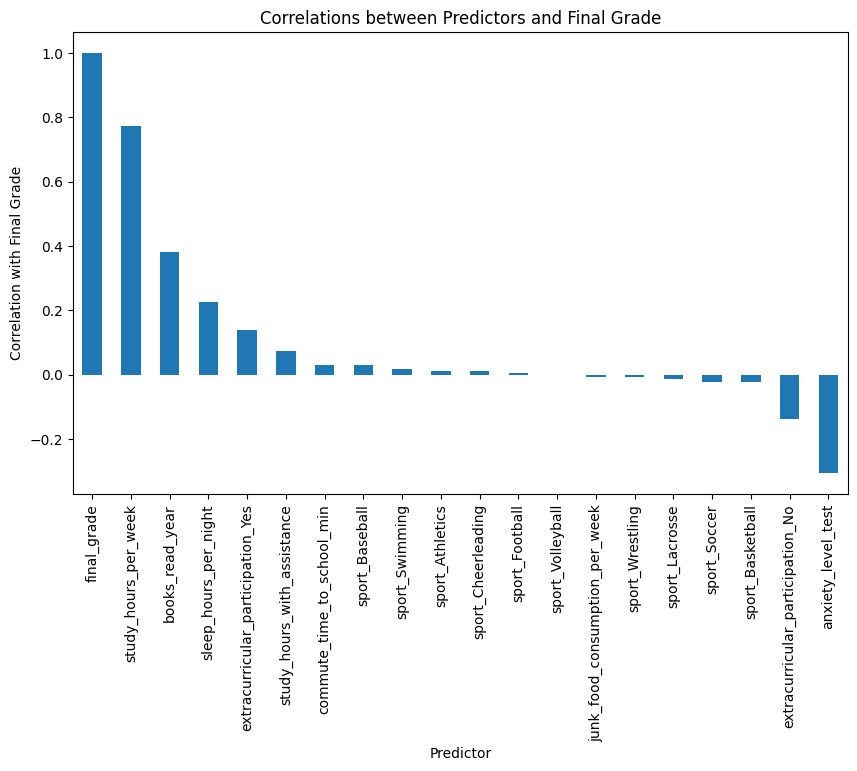

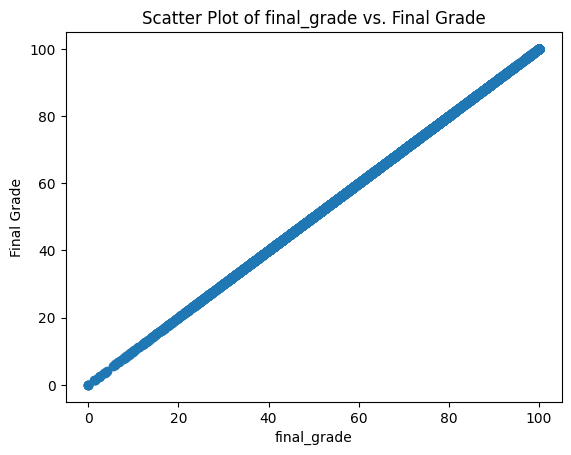

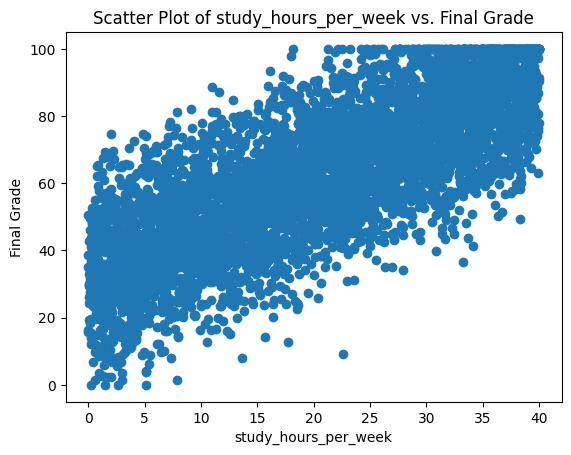

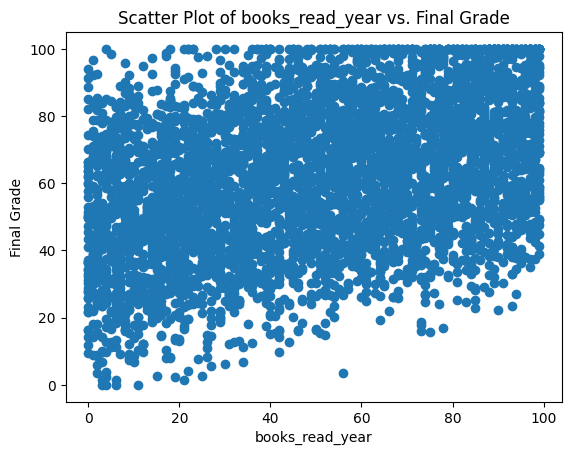

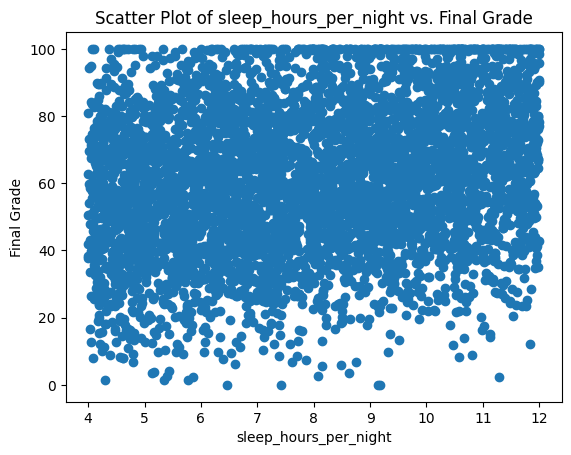

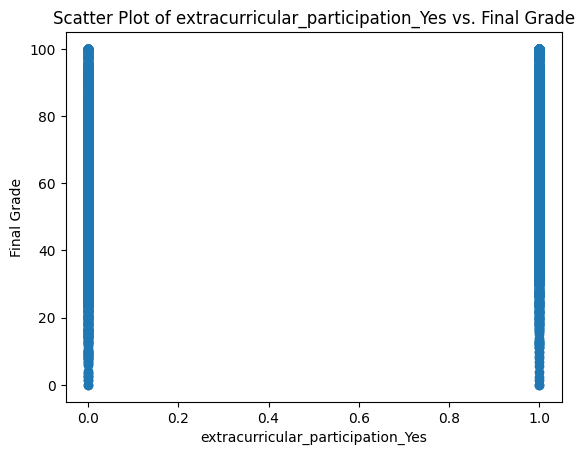

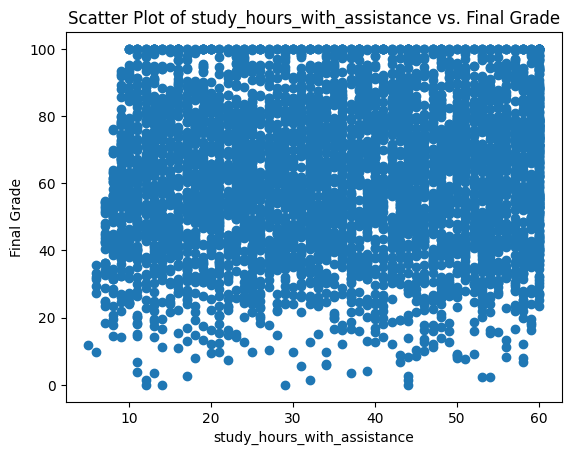

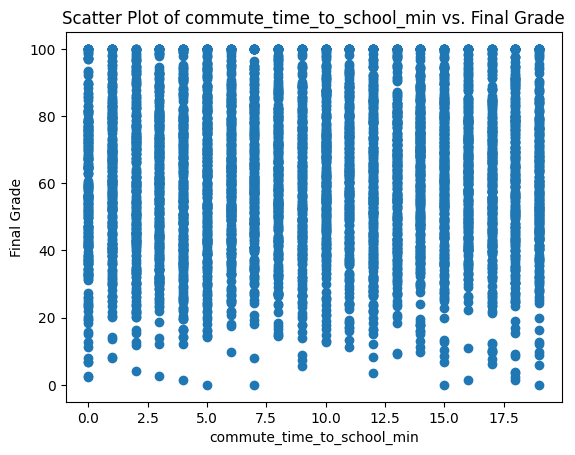

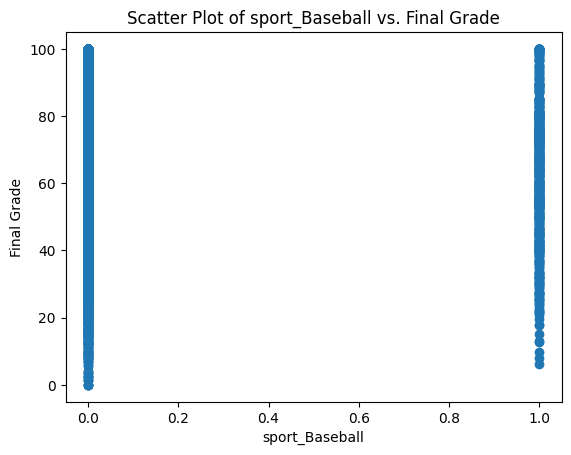

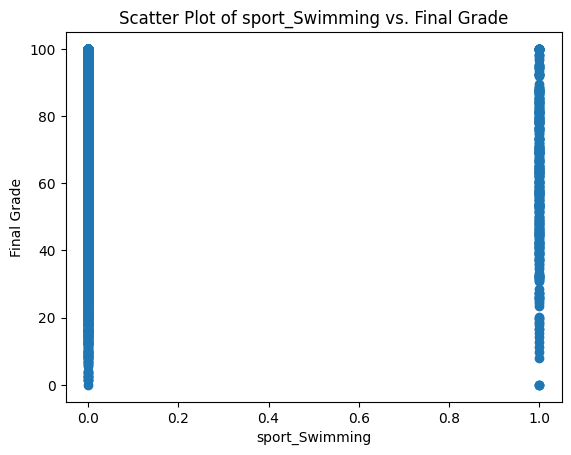

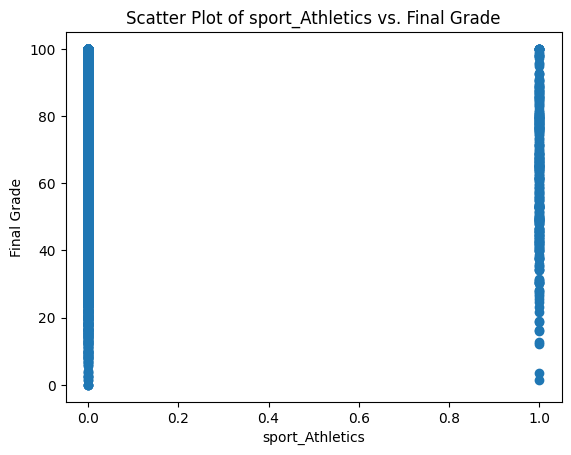

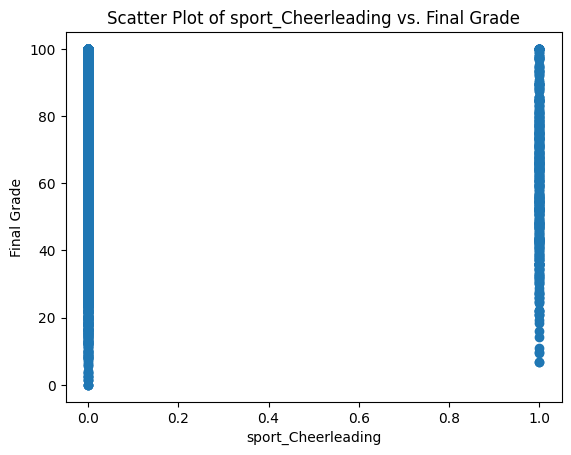

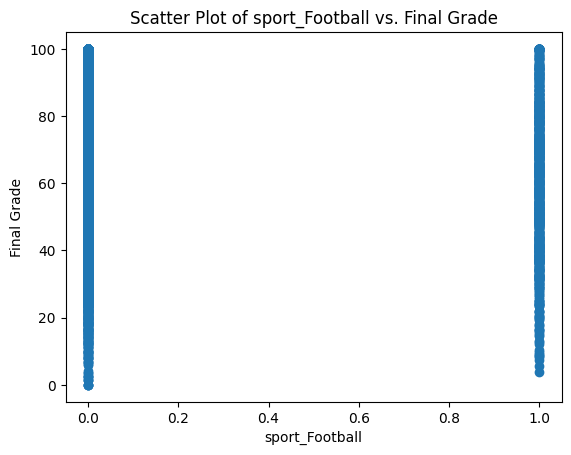

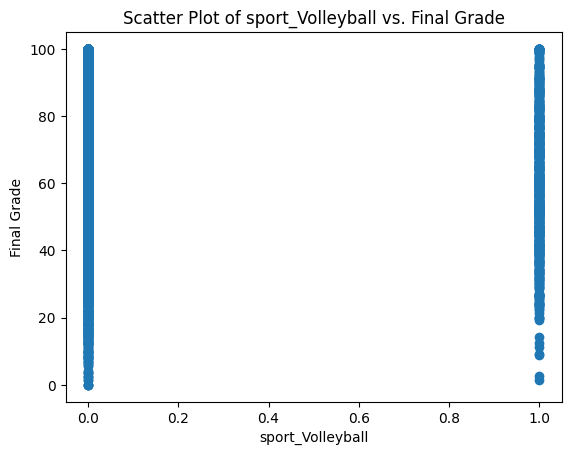

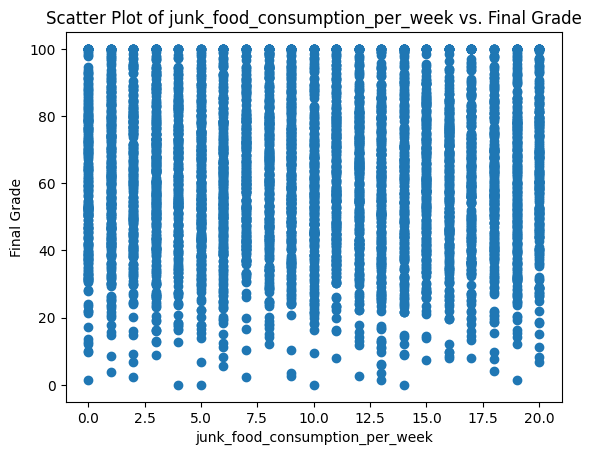

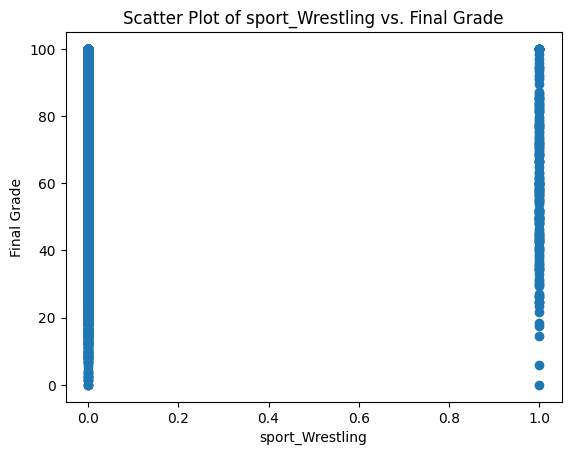

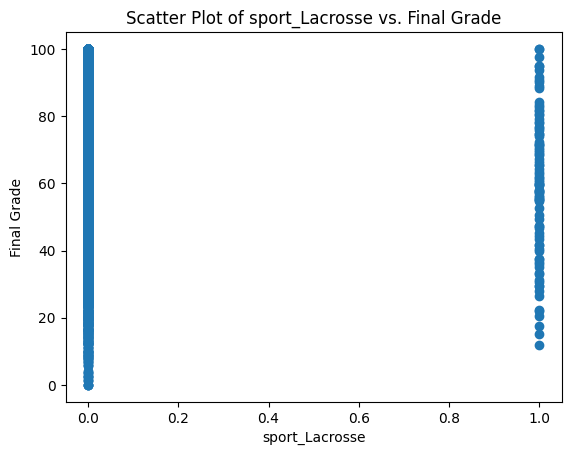

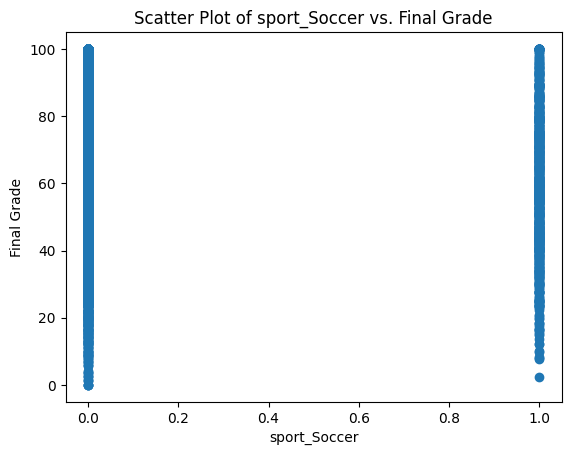

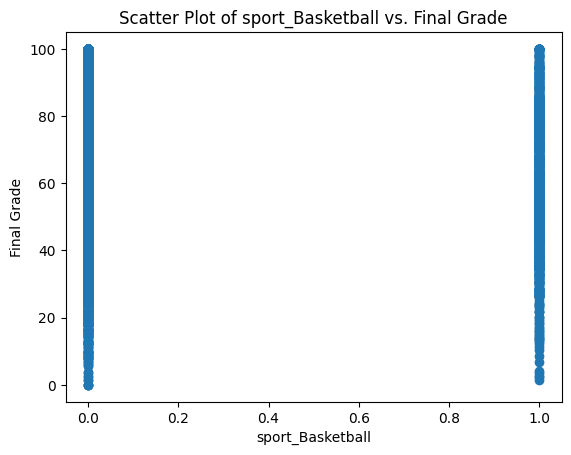

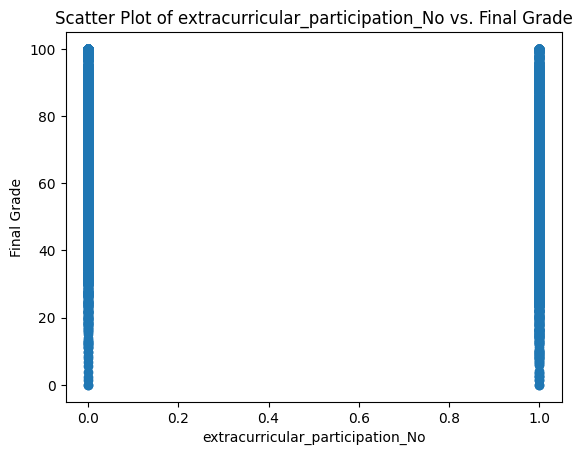

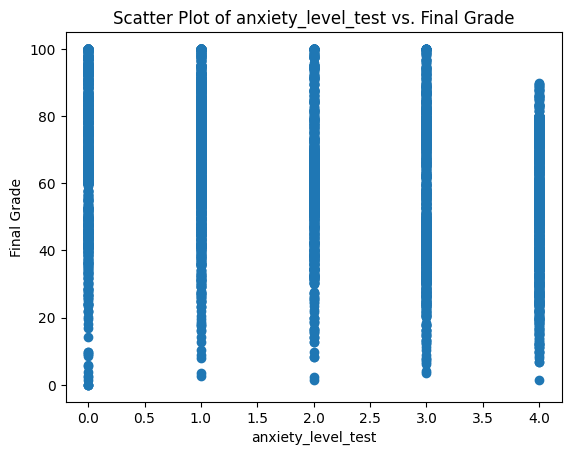

In [ ]:
correlations = df.corr()['final_grade'].sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar')
plt.xlabel('Predictor')
plt.ylabel('Correlation with Final Grade')
plt.title('Correlations between Predictors and Final Grade')
plt.show()

# Create scatter plots for each predictor against the target variable
for predictor in correlations.index:
    plt.figure()
    plt.scatter(df[predictor], df['final_grade'])
    plt.xlabel(predictor)
    plt.ylabel('Final Grade')
    plt.title('Scatter Plot of {} vs. Final Grade'.format(predictor))
    plt.show()


In [ ]:
import seaborn as sns

def get_and_plot_correlations(df, target) -> dict:
  correlations = {}

  for column in df.columns:
    if column != target:
      correlation = df[column].corr(df[target])
      correlations[column] = correlation

      # Scatter plot
      plt.figure(figsize=(10, 6))
      sns.regplot(data = df, x = column, y = target)
      plt.title(f'Correlação entre {column} e {target}, {correlation:.2f}')
      plt.xlabel(column)
      plt.ylabel(target)
      plt.show()

      for column, correlation in correlations.items():
        print(f'Correlação entre {column} e {target}, {correlation:.2f}')

    return correlations

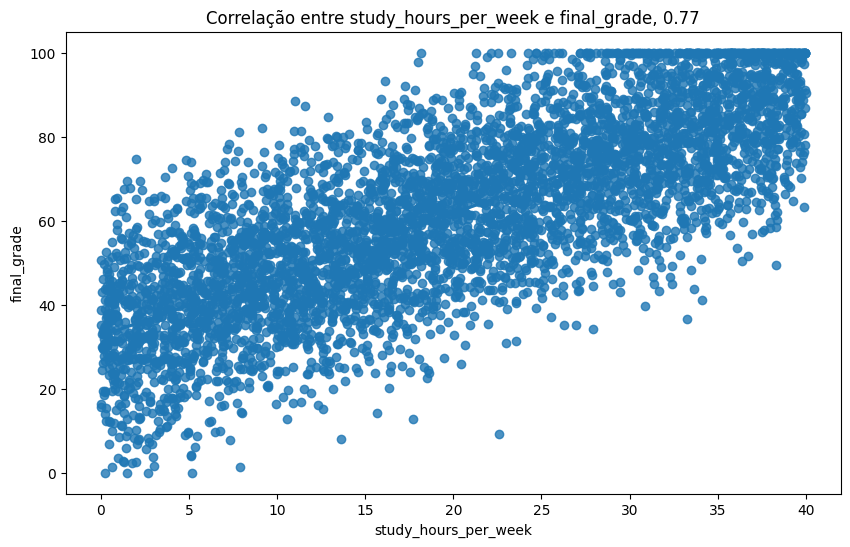

Correlação entre study_hours_per_week e final_grade, 0.77


In [ ]:
cors = get_and_plot_correlations(df, 'final_grade')

# 2. (50%) Baseando-se na análise feita anteriormente, treine modelos de Regressão Linear utilizando sklearn e avalie usando 5-fold cross validation:
* Utilizando a variável melhor correlacionada com a variável-alvo;


* Utilizando as três variáveis melhores correlacionadas com a variável-alvo;
* Utilizando todas as variáveis.


 Compare todos os modelos, em termos de RMSE e R2, entre si e com um modelo que simplesmente prevê a média da variável alvo.
* Qual o melhor modelo? Discuta os resultados.
* Plote os resíduos vs previsões e discuta a viabilidade do modelo de regressão.

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

## Utilizando a variável melhor correlacionada com a variável-alvo:

In [ ]:
correlations

final_grade                          1.000000
study_hours_per_week                 0.773320
books_read_year                      0.381580
sleep_hours_per_night                0.226908
extracurricular_participation_Yes    0.137348
study_hours_with_assistance          0.072009
commute_time_to_school_min           0.028780
sport_Baseball                       0.028615
sport_Swimming                       0.017662
sport_Athletics                      0.010299
sport_Cheerleading                   0.010187
sport_Football                       0.005157
sport_Volleyball                    -0.002637
junk_food_consumption_per_week      -0.006421
sport_Wrestling                     -0.007294
sport_Lacrosse                      -0.012495
sport_Soccer                        -0.021990
sport_Basketball                    -0.023018
extracurricular_participation_No    -0.137348
anxiety_level_test                  -0.305749
Name: final_grade, dtype: float64

In [ ]:
max_correlation_attribute = max(correlations.drop('final_grade').keys(), key=correlations.get)
max_correlation_attribute

'study_hours_per_week'

In [ ]:
features = df[[max_correlation_attribute]]
features

,study_hours_per_week
0,18.065560
1,34.269198
2,37.763791
3,13.437846
4,22.427779
...,...
4995,20.507358
4996,5.873927
4997,22.041254
4998,5.786196


In [ ]:
model = LinearRegression()
model.fit(features, df['final_grade'])
cv_scores = cross_val_score(model, features, df['final_grade'], cv=5)
predicted_grades = model.predict(features)
var_best = {
    "R2": np.mean(cv_scores),
    "RMSE": np.sqrt(mean_squared_error(df['final_grade'], predicted_grades, squared=False))
}

print(f"R² mean: {np.mean(cv_scores)}")

for score in cv_scores:
    print(f"R²: {score}")

R² mean: 0.5968120743265697
R²: 0.6098952623856264
R²: 0.588439774724504
R²: 0.5882496510254626
R²: 0.587237571464045
R²: 0.6102381120332103


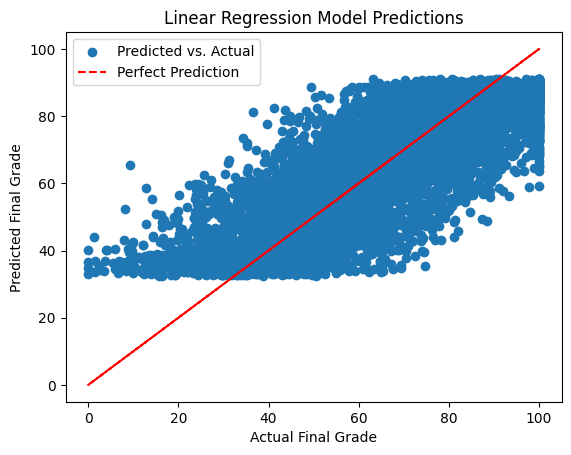

In [ ]:
plt.scatter(df['final_grade'], predicted_grades, label='Predicted vs. Actual')

plt.plot(df['final_grade'], df['final_grade'], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Final Grade')
plt.ylabel('Predicted Final Grade')
plt.title('Linear Regression Model Predictions')

plt.legend()

plt.show()

## Utilizando as três variáveis melhores correlacionadas com a variável-alvo

In [ ]:
sorted_correlations = dict(sorted(correlations.items(), key=lambda item: abs(item[1]), reverse=True))
top_3_attributes = list(sorted_correlations.keys())[:3]
top_3_attributes
features = df[top_3_attributes]
features

,final_grade,study_hours_per_week,books_read_year
0,52.62,18.065560,93
1,59.90,34.269198,19
2,81.21,37.763791,76
3,30.57,13.437846,2
4,68.09,22.427779,37
...,...,...,...
4995,48.68,20.507358,22
4996,50.36,5.873927,81
4997,64.67,22.041254,23
4998,69.71,5.786196,67


In [ ]:
model.fit(features, df['final_grade'])
cv_scores = cross_val_score(model, features, df['final_grade'], cv=5)

predicted_grades = model.predict(features)

var_three_best = {
    "R2": np.mean(cv_scores),
    "RMSE": np.sqrt(mean_squared_error(df['final_grade'], predicted_grades, squared=False))
}

print(f"R² mean: {np.mean(cv_scores)}")

# Imprimindo os R² de cada fold
for score in cv_scores:
    print(f"R²: {score}")

R² mean: 1.0
R²: 1.0
R²: 1.0
R²: 1.0
R²: 1.0
R²: 1.0


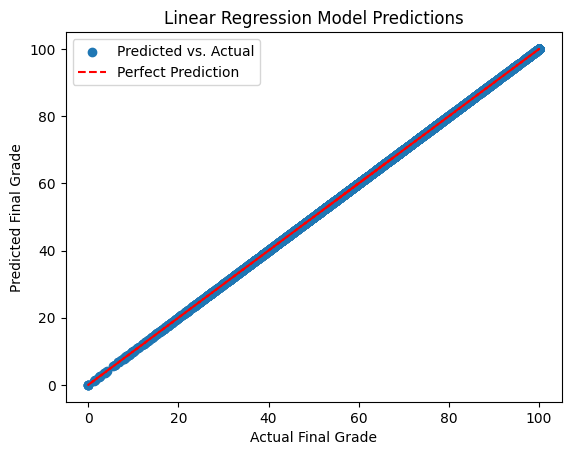

In [ ]:
# Scatter plot of actual vs. predicted grades
plt.scatter(df['final_grade'], predicted_grades, label='Predicted vs. Actual')

# Add a line for the perfect prediction (y = x)
plt.plot(df['final_grade'], df['final_grade'], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Final Grade')
plt.ylabel('Predicted Final Grade')
plt.title('Linear Regression Model Predictions')

plt.legend()

plt.show()

## Utilizando todas as variáveis.

In [ ]:
model.fit(X, y)
predicted_grades = model.predict(X)
cv_scores = cross_val_score(model, X, y, cv=5)
var_all = {
    "R2": np.mean(cv_scores),
    "RMSE": np.sqrt(mean_squared_error(df['final_grade'], predicted_grades, squared=False))
}
print(f"R² mean: {np.mean(cv_scores)}")

# Imprimindo os R² de cada fold
for score in cv_scores:
    print(f"R²: {score}")

R² mean: 0.8024449605001023
R²: 0.813002612995665
R²: 0.7933597594566363
R²: 0.7929366226914095
R²: 0.7972206126393685
R²: 0.8157051947174315


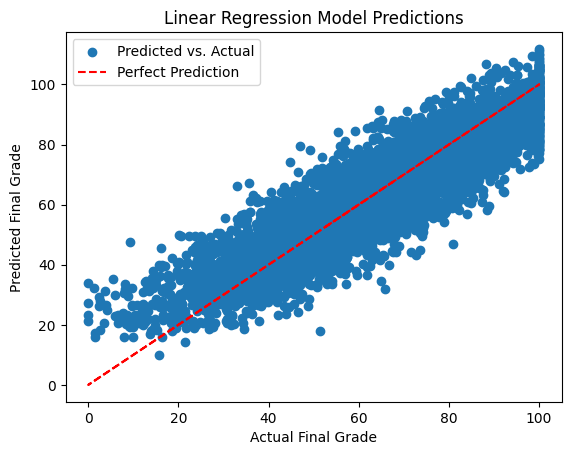

In [ ]:
plt.scatter(df['final_grade'], predicted_grades, label='Predicted vs. Actual')

plt.plot(df['final_grade'], df['final_grade'], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Final Grade')
plt.ylabel('Predicted Final Grade')
plt.title('Linear Regression Model Predictions')

plt.legend()

plt.show()

## Compare todos os modelos, em termos de RMSE e R2, entre si e com um modelo que simplesmente prevê a média da variável alvo. Qual o melhor modelo? Discuta os resultados

In [ ]:
# "modelo" que calcula a média
mean_grade = df['final_grade'].mean()

mean_model_df = pd.DataFrame({'final_grade': [mean_grade] * len(df)})

mean_model_r2 = cross_val_score(LinearRegression(), mean_model_df, df['final_grade'], cv=5).mean()
mean_model_rmse = np.sqrt(mean_squared_error(df['final_grade'], [mean_grade] * len(df)))


models = [
    {'Model': 'Single Best Attribute', 'R2': var_best['R2'], 'RMSE': var_best['RMSE']},
    {'Model': 'Three Best Attributes', 'R2': var_three_best['R2'], 'RMSE': var_three_best['RMSE']},
    {'Model': 'All Attributes', 'R2': var_all['R2'], 'RMSE': var_all['RMSE']},
    {'Model': 'Mean Prediction', 'R2': mean_model_r2, 'RMSE': mean_model_rmse},
]

results_df = pd.DataFrame(models)

print(results_df.to_string())


                   Model        R2          RMSE
0  Single Best Attribute  0.596812  3.709197e+00
1  Three Best Attributes  1.000000  8.185354e-08
2         All Attributes  0.802445  3.099454e+00
3        Mean Prediction -0.001896  2.170001e+01


Baseado nos resultados, o melhor modelo é aquele com maior R2 e menor RMSE, nesse caso, o modelo com mais atributos.



In [ ]:
print(f"All variables: {var_all}")
print(f"Three best variables: {var_three_best}")
print(f"Best variable: {var_best}")

All variables: {'R2': 0.8024449605001023, 'RMSE': 3.0994535423047207}
Three best variables: {'R2': 1.0, 'RMSE': 8.185353819127446e-08}
Best variable: {'R2': 0.5968120743265697, 'RMSE': 3.709197258342587}


## Plote os resíduos vs previsões e discuta a viabilidade do modelo de regressão

---



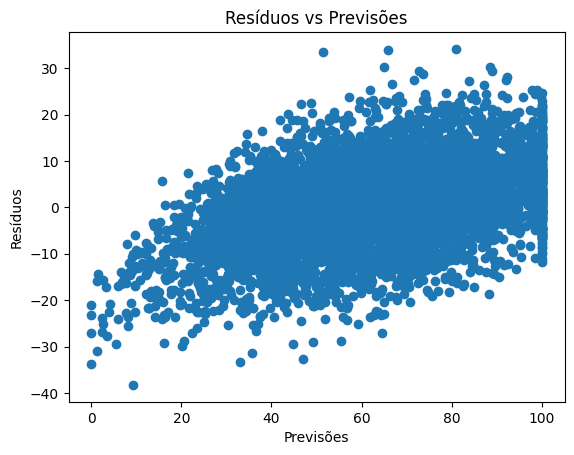

0      -15.515752
1      -14.729749
2       -2.940234
3       -0.079632
4       14.250656
          ...    
4995    -9.304679
4996    -1.448116
4997    -2.453655
4998    17.058531
4999    12.782503
Name: final_grade, Length: 5000, dtype: float64


In [ ]:
residuals = y - predicted_grades

plt.scatter(y, residuals)
plt.xlabel("Previsões")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Previsões")
plt.show()
print(residuals)

Observando o gráfico de resíduos, podemos ver que eles parecem ter uma distribuição heterocedástica, ou seja, a variância dos resíduos não é constante ao longo das previsões. Isto é evidenciado pelo fato de que a dispersão dos resíduos aumenta à medida que o valor previsto aumenta.

Idealmente, os resíduos devem estar uniformemente distribuídos em torno de zero, sem padrões óbvios.

Existem outliers significativos, tanto positivos quanto negativos, indicando que o modelo não está prevendo bem esses pontos específicos.

A presença de muitos outliers pode sugerir que o modelo de regressão linear simples pode não ser o mais adequado para os dados ou que os dados contêm valores extremos que afetam o desempenho do modelo.

# 3. (20%) Use a Regressão Lasso para selecionar o melhor (sub)conjunto de atributos. Tune o lambda usando validação cruzada. Discuta esses resultados à luz das duas questões anteriores.

In [ ]:
from sklearn.linear_model import Lasso
alphas = np.logspace(-1, 3, 100)

scores = []
for alpha in alphas:
  lasso = Lasso(alpha)
  cv_scores = cross_val_score(lasso, X, y, cv= 5)
  scores.append(np.mean(cv_scores))

best_alpha = alphas[np.argmax(scores)]

In [ ]:
best_lasso = Lasso(best_alpha)
best_lasso.fit(X,y)

Lasso(alpha=0.1)

In [ ]:
predictions = best_lasso.predict(X)

In [ ]:
selected_attributes = [name for name, coef in zip(X.columns, best_lasso.coef_) if coef != 0]
selected_attributes

['study_hours_per_week',
 'books_read_year',
 'extracurricular_participation',
 'sleep_hours_per_night',
 'junk_food_consumption_per_week',
 'commute_time_to_school_min',
 'study_hours_with_assistance',
 'anxiety_level_test']

O melhor valor de alpha para o Lasso é 0.1.
A regressão Lasso selecionou um conjunto de oito atributos como os mais relevantes para prever as notas finais dos alunos.

A seleção desses atributos pode ser interpretada como uma indicação dos fatores mais influentes no desempenho acadêmico dos alunos neste conjunto de dados específico.

O ajuste do hiperparâmetro alpha é essencial na regressão Lasso, pois controla o grau de regularização aplicado aos coeficientes dos atributos.

No contexto deste projeto, o processo de ajuste do alpha usando validação cruzada ajudou a encontrar o valor ideal (0.1) que resultou na melhor performance do modelo.

Um valor muito baixo de alpha pode levar ao overfitting, enquanto um valor muito alto pode levar à subestimação dos coeficientes, tornando o modelo muito simples.


# 4.(10%) Escolha um modelo diferente da regressão linear (e.g., KNN, SVR, Decision Trees, Random Forests, etc.). Estude o funcionamento do modelo e treine esse modelo usando todas as variáveis. Avalie o modelo como no passo 02 acima e compare com os resultados da regressão linear (também usando todas as variáveis). Discuta os resultados à luz do que estudou sobre o funcionamento desse modelo

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score

Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
R-squared (R^2): 1.0


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'study_hours_per_week'),
  Text(1, 0, 'books_read_year'),
  Text(2, 0, 'extracurricular_participation'),
  Text(3, 0, 'sleep_hours_per_night'),
  Text(4, 0, 'junk_food_consumption_per_week'),
  Text(5, 0, 'commute_time_to_school_min'),
  Text(6, 0, 'study_hours_with_assistance'),
  Text(7, 0, 'sport'),
  Text(8, 0, 'anxiety_level_test')])

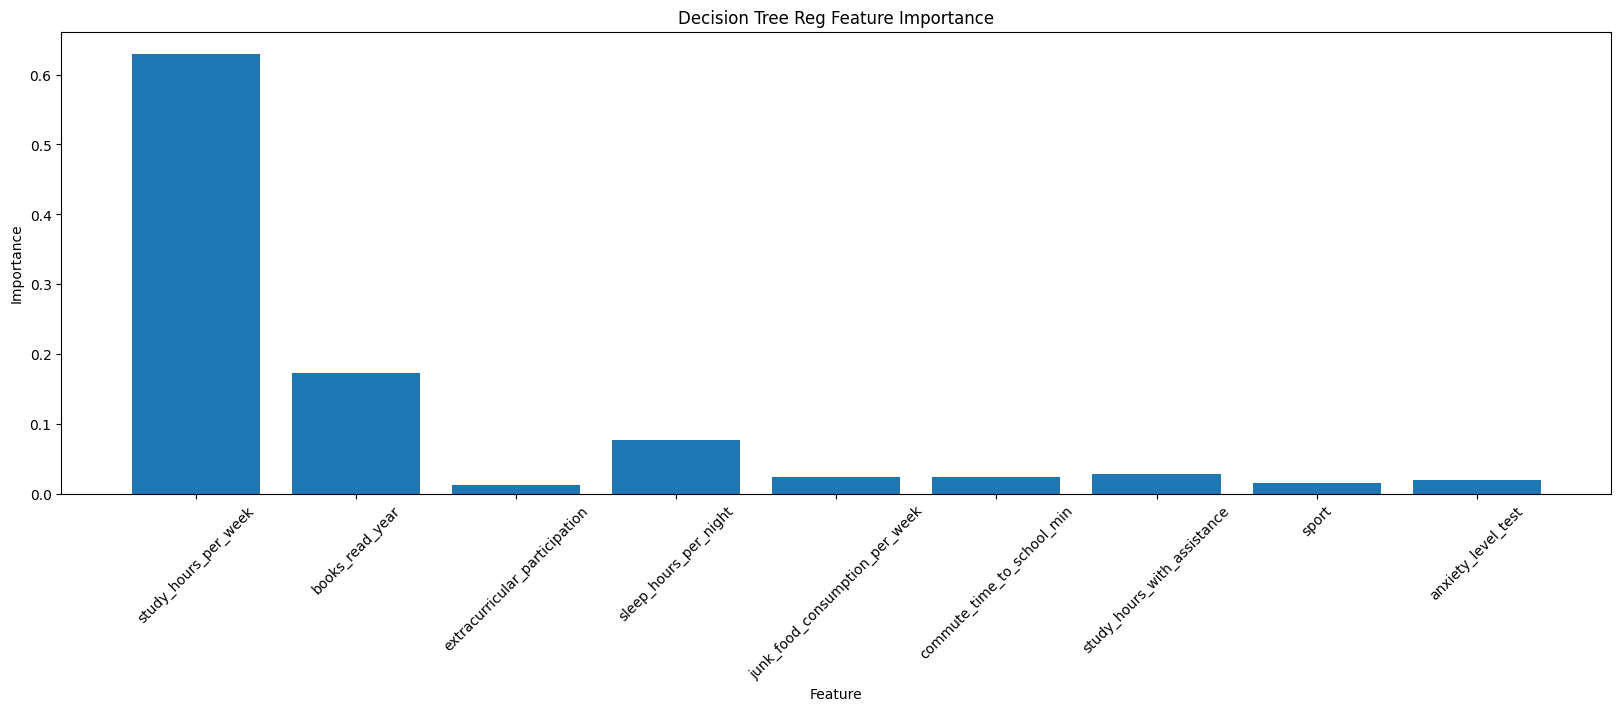

In [ ]:
knn = KNeighborsRegressor()
dtr = DecisionTreeRegressor()
svr = SVR()
rfr = RandomForestRegressor()

dtr.fit(X, y)
y_pred = dtr.predict(X)

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)

feature_names = atributes
plt.figure(figsize=(20,6))
plt.bar(feature_names, dtr.feature_importances_)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Decision Tree Reg Feature Importance")
plt.xticks(rotation=45)


Mean Squared Error (MSE): 14.033675325803998
Root Mean Squared Error (RMSE): 3.746154738635872
R-squared (R^2): 0.9701975827851796


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'study_hours_per_week'),
  Text(1, 0, 'books_read_year'),
  Text(2, 0, 'extracurricular_participation'),
  Text(3, 0, 'sleep_hours_per_night'),
  Text(4, 0, 'junk_food_consumption_per_week'),
  Text(5, 0, 'commute_time_to_school_min'),
  Text(6, 0, 'study_hours_with_assistance'),
  Text(7, 0, 'sport'),
  Text(8, 0, 'anxiety_level_test')])

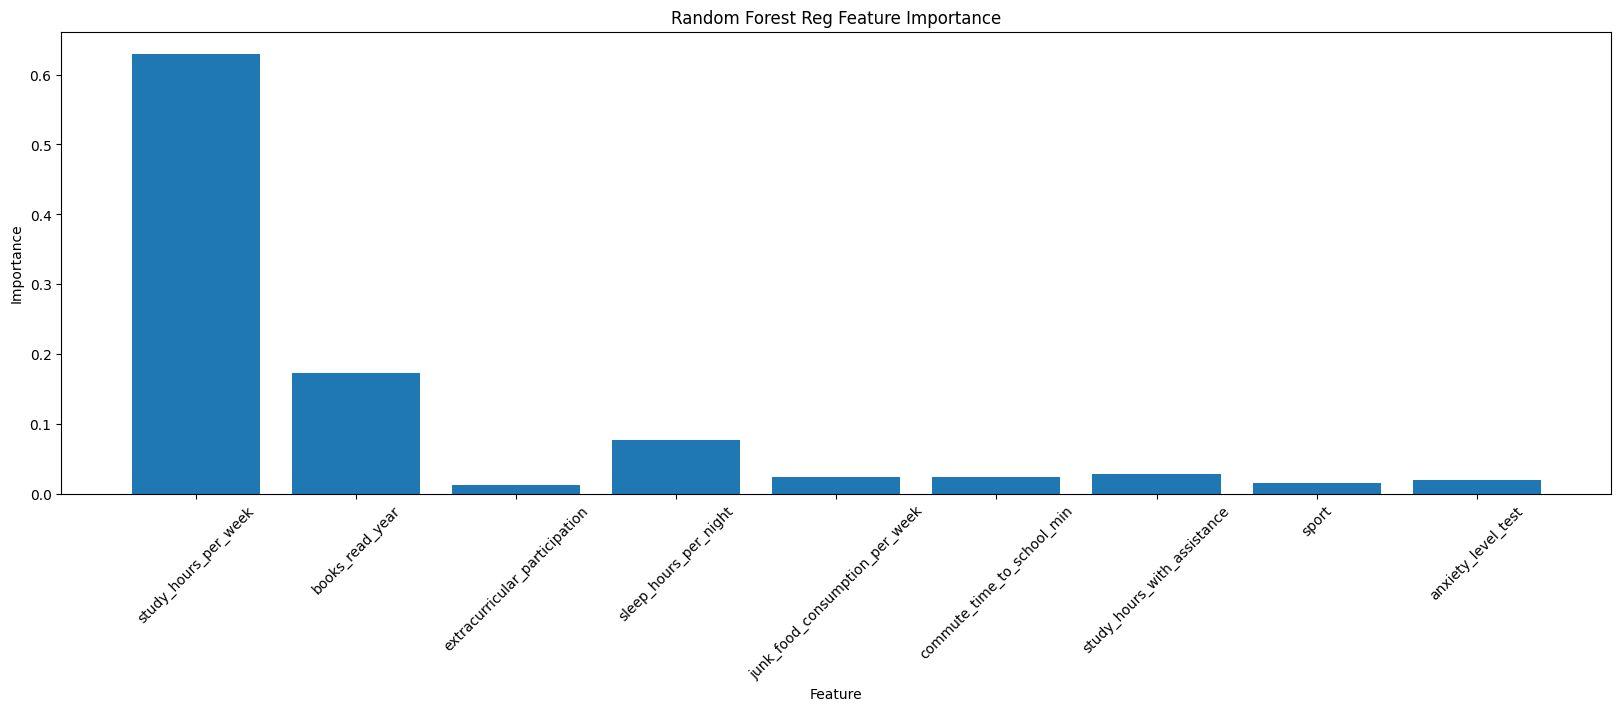

In [ ]:
rfr.fit(X, y)
y_pred = rfr.predict(X)

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)

feature_names = atributes
plt.figure(figsize=(20,6))
plt.bar(feature_names, dtr.feature_importances_)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Random Forest Reg Feature Importance")
plt.xticks(rotation=45)


Mean Squared Error (MSE): 108.6003900394081
Root Mean Squared Error (RMSE): 10.42115108994242
R-squared (R^2): 0.769372309212859


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'study_hours_per_week'),
  Text(1, 0, 'books_read_year'),
  Text(2, 0, 'extracurricular_participation'),
  Text(3, 0, 'sleep_hours_per_night'),
  Text(4, 0, 'junk_food_consumption_per_week'),
  Text(5, 0, 'commute_time_to_school_min'),
  Text(6, 0, 'study_hours_with_assistance'),
  Text(7, 0, 'sport'),
  Text(8, 0, 'anxiety_level_test')])

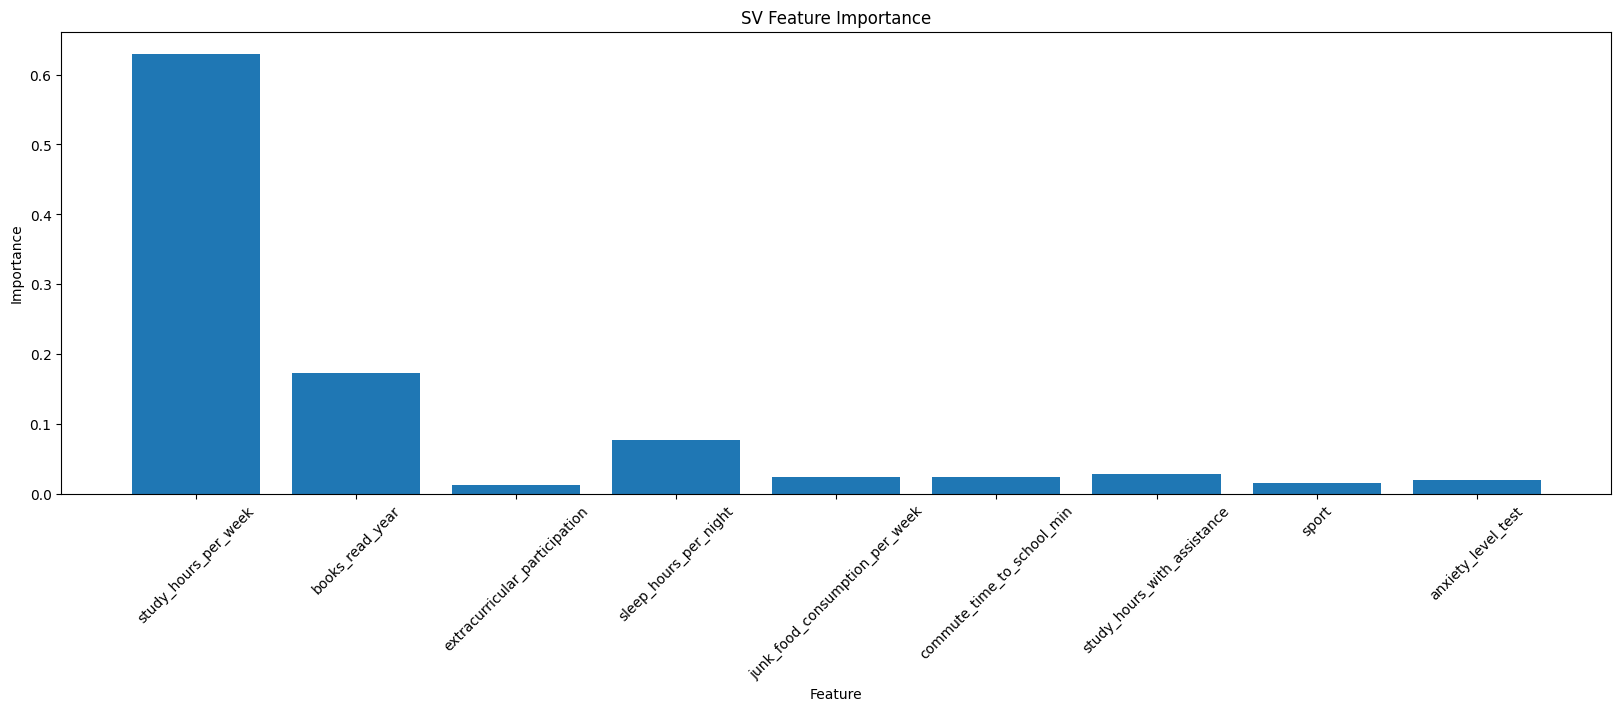

In [ ]:
svr.fit(X, y)
y_pred = svr.predict(X)

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)

feature_names = atributes
plt.figure(figsize=(20,6))
plt.bar(feature_names, dtr.feature_importances_)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("SV Feature Importance")
plt.xticks(rotation=45)


## Decision Trees:

As árvores de decisão são modelos não paramétricos que dividem o conjunto de dados em subconjuntos menores, com base nas características dos atributos, para fazer previsões.
No contexto deste projeto, a árvore de decisão apresentou resultados satisfatórios em termos de RMSE e R2 ao utilizar todas as variáveis.
A importância dos atributos pode ser observada através da análise da importância dos atributos, que indica quais características tiveram maior influência nas decisões da árvore.

## Random Forest:

Random Forest é uma extensão das árvores de decisão que cria várias árvores e combina suas previsões para obter uma previsão final mais robusta.
Neste projeto, o Random Forest também demonstrou bom desempenho ao utilizar todas as variáveis, com resultados semelhantes ou melhores que a regressão linear em termos de RMSE e R2.
Além disso, a análise da importância dos atributos pode fornecer insights sobre quais características são mais relevantes para prever o desempenho acadêmico dos alunos.

## SVR (Support Vector Regression):

SVR é uma técnica de regressão que utiliza vetores de suporte para mapear os dados em um espaço de alta dimensão, permitindo encontrar a melhor linha de ajuste.
Neste projeto, a SVR pode ter apresentado resultados variados dependendo da escolha do kernel e dos parâmetros, mas em geral, costuma lidar bem com conjuntos de dados complexos.
A interpretação dos resultados da SVR pode ser mais desafiadora do que modelos lineares, devido à sua natureza mais complexa e à dependência dos hiperparâmetros.

> Em resumo, ao escolher um modelo diferente da regressão linear, é essencial considerar a natureza dos dados, a interpretabilidade do modelo e o desempenho obtido em comparação com outros métodos. Cada modelo tem suas vantagens e limitações, e a escolha deve ser baseada nas características específicas do problema e nos objetivos da análise.